In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot

In [ ]:
# Este conjunto de dados aborda o desempenho de estudantes do ensino secundário em duas escolas portuguesas. Os atributos incluem notas dos alunos, características demográficas, sociais e relacionadas à escola, e foram coletados a partir de relatórios escolares e questionários.

# Dois conjuntos de dados são fornecidos em relação ao desempenho em duas disciplinas distintas: Matemática (mat) e Língua Portuguesa (por). Em [Cortez e Silva, 2008], os dois conjuntos de dados foram modelados em tarefas de classificação binária/de cinco níveis e de regressão.

# Nota importante: o atributo alvo G3 apresenta forte correlação com os atributos G2 e G1. Isso ocorre porque G3 é a nota final do ano (atribuída no 3º período), enquanto G1 e G2 correspondem às notas do 1º e 2º períodos. É mais difícil prever G3 sem G2 e G1, mas tal previsão é muito mais útil (ver fonte do artigo para mais detalhes).

In [6]:
dataset = pd.read_csv('student_por.csv')
print(dataset.shape)
dataset.head()

(649, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [7]:
trabalho_mae = dataset[(dataset['Mjob'] == 'teacher')]
print(trabalho_mae.shape)
trabalho_mae.head()

(72, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
10,GP,F,15,U,GT3,T,4,4,teacher,health,...,3,3,3,1,2,2,2,14,14,14
13,GP,M,15,U,GT3,T,4,3,teacher,other,...,5,4,3,1,2,3,0,12,12,13
20,GP,M,15,U,GT3,T,4,3,teacher,other,...,4,4,1,1,1,1,0,12,13,14
22,GP,M,16,U,LE3,T,4,2,teacher,other,...,4,5,1,1,3,5,0,12,13,14
29,GP,M,16,U,GT3,T,4,4,teacher,teacher,...,4,4,5,5,5,5,4,12,11,12


In [8]:
media_final = trabalho_mae[(trabalho_mae['G3'] >= 18)]
media_final = pd.to_numeric(trabalho_mae['G3'], errors='coerce')
media_final = media_final.dropna()

q1 = media_final.quantile(0.25)
q3 = media_final.quantile(0.75)
iqr = q3 - q1
lim_inf = q1 - 1.5 * iqr
lim_sup = q3 + 1.5 * iqr

media_final = media_final[(media_final >= lim_inf) & (media_final <= lim_sup)]

print(media_final.shape)
media_final.head()

(70,)


10    14
13    13
20    14
22    14
29    12
Name: G3, dtype: int64

In [62]:
media = np.mean(media_final)
mediana = np.median(media_final)
quartis = np.quantile(media_final, [0.25, 0.50, 0.75, 1])
desvio_padrao = np.std(media_final)
variancia = np.var(media_final)

print(f"Média: {media:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Quartis: {quartis}")
print(f"Desvio-Padrão: {desvio_padrao:.2f}")
print(f"Variância: {variancia:.2f}")

Média: 13.51
Mediana: 13.00
Quartis: [12. 13. 15. 19.]
Desvio-Padrão: 2.45
Variância: 6.02


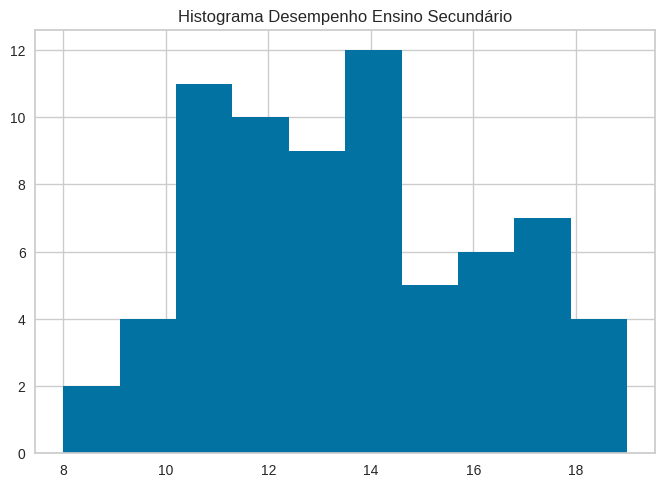

In [64]:
# Teste de Normalidade - Histograma

plt.hist(media_final, bins=10)
plt.title('Histograma Desempenho Ensino Secundário')
plt.show()

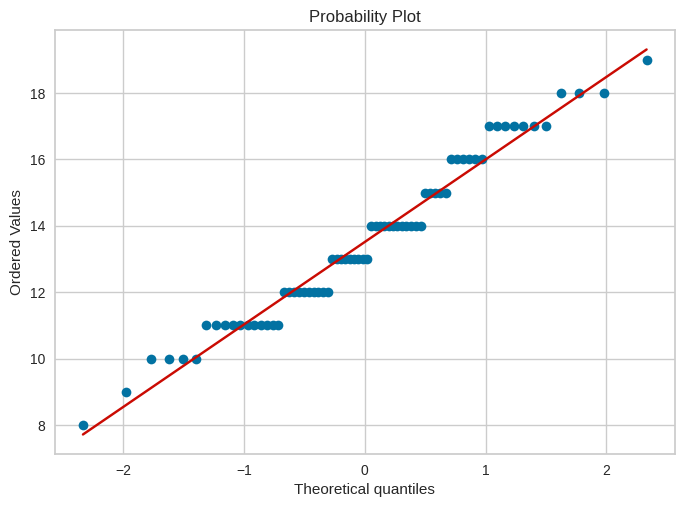

In [65]:
# Teste de Normailidade - Q-Q Plot

fig, ax = plt.subplots()
stats.probplot(media_final, fit=True,   plot=ax)
plt.show()

In [66]:
# Teste de Normalidade - Shapiro
# p > 0.05

stats.shapiro(media_final)

ShapiroResult(statistic=np.float64(0.9682640037491989), pvalue=np.float64(0.07268525670103052))

In [ ]:
# Eliminando os outliers do modelo temos que alunos filhos de mães professoras e que obitiveram média final >= 18, estão normalmente distrbuídos, ou seja, 13.51 alunos de média.

In [71]:
# Qual a probabilidade de escolhido ao acaso um aluno, filho de mãe professora, ele tiver obitido média final > 18:

prob = stats.norm.sf(18, media, desvio_padrao)

print(f"A Probabilidade é de {prob * 100:.2f}%")


A Probabilidade é de 3.38%


In [96]:
# Criação de um modelo para prevê a quantidade de horas de estudo diárias e sua média final.

X = trabalho_mae['studytime'].values
y = trabalho_mae['G3'].values
X

array([14, 13, 14, 14, 12, 15, 14, 11, 13, 16, 13, 16, 11, 11, 10, 14, 14,
       18, 14, 15, 14, 11, 13,  8, 10, 11, 11, 11, 12, 11, 15, 12, 16, 13,
        9, 14, 12, 15, 12, 17, 11, 12, 12, 10, 13, 17, 16, 17, 17, 13, 13,
       15, 13, 17, 14, 17, 11, 14, 17, 12, 12,  0, 18,  0, 18, 12, 16, 14,
       19, 11, 10, 16])

In [99]:
correlacao = np.corrcoef(X, y)
print(correlacao)
print(correlacao ** 2)

[[1.         0.15632175]
 [0.15632175 1.        ]]
[[1.         0.02443649]
 [0.02443649 1.        ]]


In [ ]:
# Ao contrário do que se possa achar, o número de horas que um aluno tira diariamente para estudar e sua média final no Ensino Secundária nas Escolas Portuguesas, tem uma fraca Coeficiente de Correlação = 0.1562 e seu Coeficiente de Determinação = 0.0224 ou 2,24% o que indica que o número de horas de estudo não determina uma média final alta do aluno, ou seja, a qualidade do estudo é mais importante que a quantidade dispendida no estudo.

# É apenas um modelo com uma variável exploratória (horas de estudo) e a média final. Outro fato que deve-se notar é que um estudo, em pequenas quantidades mas levados por anos consistentemente trás bem mais resultados que estudar 10 horas por dia para passar em exames de avaliação. O métod de ensino no mundo é falho e não produz bons alunos. São ensinados a decorarem mais do que a aprenderem de fato. O aprendizado leva uma vida, deveria ser transdisciplinar e humanista, com vocação a melhorias sociais. Hoje temos excesso de especialistas em um determinado área do saber mas totalmente leigo em questões fundamentais de outras áeras do saber, fundamentais para formação cultural.

# Uma crítica que se deve levantar é se a Educação é um bem público por excelência ou cabe também ao mercado atuar. No meu humilde entender, a Educação Básica deveria ser apenas pública, sem interferência do mercado, e o Ensino Superior algo híbrido, com o mercado atuando naquilo que lhes convém, como em Curso de TI.

# Não deveria haver espaço para escolas privadas no Ensino Básico, do Fundamental ao Médio, este é o ponto de partida decisivo para igualar crianças e jovens de baixa-renda ao de alta-renda, como pressuposto de que partindo das mesmas condições iniciais, cabe a cada um seu empenho.

In [102]:
# Formato de matriz com uma coluna a mais
X = X.reshape(-1, 1)
# Criação do modelo e treinamento (fit indica que o treinamento deve ser executado)
modelo = LinearRegression()
modelo.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


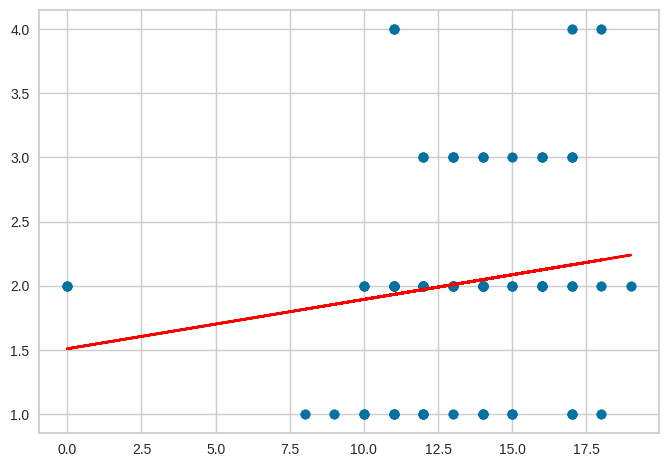

In [103]:
# Geração do gráfico com os pontos reais e as previsões
plt.scatter(X, y)
plt.plot(X, modelo.predict(X), color = 'red')


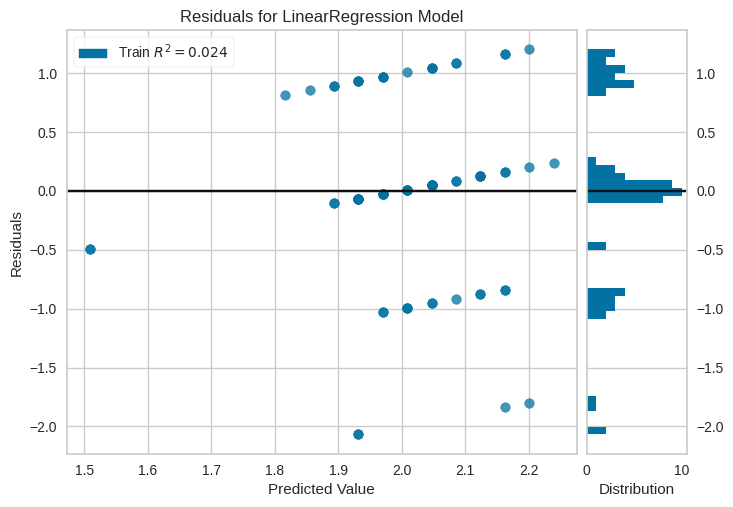

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [104]:
# Gráfico para visualizar os residuais
visualizador = ResidualsPlot(modelo)
visualizador.fit(X, y)
visualizador.poof()